In [ ]:

import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

100%|██████████| 9912422/9912422 [05:04<00:00, 32536.02it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 158245.75it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:50<00:00, 32964.40it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12950733.36it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


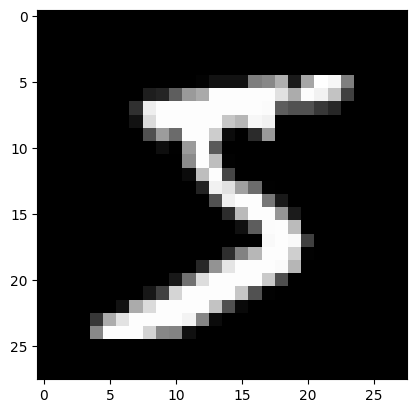

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


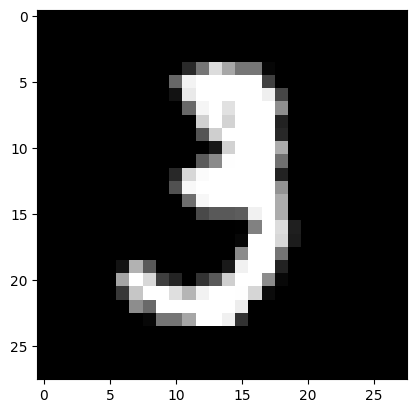

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


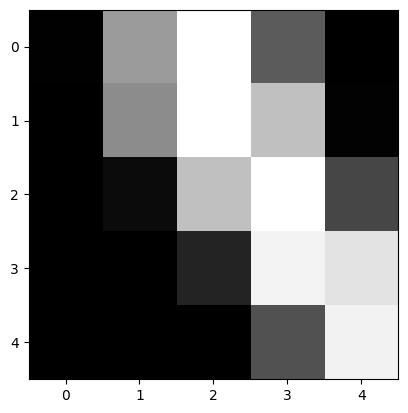

In [ ]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0006, -0.0159, -0.0021,  ..., -0.0241,  0.0354, -0.0108],
        [ 0.0127,  0.0083,  0.0005,  ..., -0.0161, -0.0305, -0.0038],
        [ 0.0293,  0.0341, -0.0295,  ..., -0.0301,  0.0106, -0.0346],
        ...,
        [ 0.0345,  0.0301,  0.0353,  ..., -0.0208,  0.0330, -0.0257],
        [-0.0009, -0.0296,  0.0214,  ..., -0.0228, -0.0103, -0.0335],
        [-0.0059,  0.0150,  0.0160,  ..., -0.0305,  0.0292, -0.0175]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0251,  0.0293,  0.0312, -0.0043, -0.0277, -0.0006, -0.0118,  0.0027,
         0.0050, -0.0118], requires_grad=True)

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0207,  0.0091, -0.0125,  ...,  0.0307, -0.0073,  0.0195],
         [ 0.0312,  0.0210, -0.0031,  ...,  0.0029,  0.0069,  0.0183],
         [ 0.0033,  0.0163, -0.0215,  ...,  0.0129, -0.0062,  0.0106],
         ...,
         [-0.0219,  0.0299, -0.0089,  ..., -0.0345, -0.0148, -0.0209],
         [-0.0038, -0.0245,  0.0178,  ..., -0.0205,  0.0221, -0.0128],
         [-0.0238, -0.0212,  0.0019,  ..., -0.0235,  0.0143, -0.0272]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0171, -0.0145,  0.0297,  0.0176,  0.0317, -0.0175, -0.0175, -0.0318,
         -0.0304, -0.0224], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1038, -0.2471, -0.2829,  0.2492,  0.3210, -0.4007, -0.1245, -0.0456,
         -0.0527, -0.0304],
        [-0.2190,  0.2701, -0.2707,  0.1802,  0.3533,  0.0265, -0.0532, -0.2326,
         -0.2121,  0.0517]])


In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:2]

tensor([[-0.1038, -0.2471, -0.2829,  0.2492,  0.3210, -0.4007, -0.1245, -0.0456,
         -0.0527, -0.0304],
        [-0.2190,  0.2701, -0.2707,  0.1802,  0.3533,  0.0265, -0.0532, -0.2326,
         -0.2121,  0.0517]], grad_fn=<SliceBackward0>)

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0946, 0.0820, 0.0791, 0.1347, 0.1447, 0.0703, 0.0927, 0.1003, 0.0996,
         0.1018],
        [0.0793, 0.1294, 0.0753, 0.1182, 0.1406, 0.1014, 0.0936, 0.0783, 0.0799,
         0.1040]])
Sum:  1.0000001192092896


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 4, 3, 4, 1, 3, 9, 3, 3, 3, 4, 1, 3, 4, 1, 4, 4, 1, 1, 7, 1, 3, 9, 3,
        8, 1, 3, 3, 1, 1, 1, 7, 3, 1, 1, 4, 3, 1, 3, 4, 1, 3, 3, 1, 3, 3, 3, 4,
        3, 3, 3, 1, 1, 4, 4, 1, 3, 3, 3, 1, 4, 1, 3, 4, 3, 3, 3, 3, 9, 3, 1, 4,
        3, 1, 1, 4, 4, 9, 1, 1, 6, 1, 3, 3, 3, 3, 3, 3, 8, 3, 3, 1, 4, 4, 3, 1,
        4, 1, 1, 1, 1, 1, 6, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 8, 7, 1, 1, 3, 3, 3,
        4, 1, 3, 3, 3, 3, 3, 4])
tensor([0.1447, 0.1406, 0.1308, 0.1409, 0.1596, 0.1191, 0.1226, 0.1274, 0.1400,
        0.1523, 0.1524, 0.1373, 0.1480, 0.1194, 0.1578, 0.1429, 0.1281, 0.1490,
        0.1207, 0.1323, 0.1184, 0.1492, 0.1329, 0.1248, 0.1212, 0.1360, 0.1355,
        0.1527, 0.1224, 0.1432, 0.1332, 0.1304, 0.1289, 0.1314, 0.1476, 0.1273,
        0.1686, 0.1599, 0.1645, 0.1531, 0.1310, 0.1385, 0.1314, 0.1383, 0.1242,
        0.1167, 0.1362, 0.1244, 0.1168, 0.1269, 0.1588, 0.1533, 0.1461, 0.1169,
        0.1852, 0.1918, 0.1391, 0.1472, 0.1337, 0.1246, 0.1280, 0.1439, 0.1381,
       

In [ ]:
labels

tensor([1, 7, 1, 6, 6, 1, 0, 8, 7, 1, 2, 0, 6, 8, 6, 7, 0, 8, 9, 8, 4, 8, 4, 6,
        7, 5, 8, 4, 4, 2, 7, 3, 4, 4, 6, 7, 3, 6, 0, 3, 2, 3, 3, 6, 3, 8, 1, 1,
        9, 0, 0, 3, 4, 6, 2, 5, 1, 6, 8, 4, 9, 6, 1, 9, 1, 9, 3, 1, 4, 0, 6, 2,
        4, 6, 4, 9, 7, 6, 4, 6, 0, 5, 1, 1, 7, 0, 5, 3, 2, 4, 2, 6, 2, 1, 3, 3,
        7, 5, 9, 5, 4, 4, 4, 6, 2, 1, 9, 7, 1, 1, 1, 9, 1, 5, 1, 6, 8, 0, 3, 7,
        2, 6, 6, 0, 0, 7, 3, 0])

In [ ]:
outputs[:2]

tensor([[-0.1038, -0.2471, -0.2829,  0.2492,  0.3210, -0.4007, -0.1245, -0.0456,
         -0.0527, -0.0304],
        [-0.2190,  0.2701, -0.2707,  0.1802,  0.3533,  0.0265, -0.0532, -0.2326,
         -0.2121,  0.0517]], grad_fn=<SliceBackward0>)

In [ ]:
torch.sum(preds == labels)

tensor(9)

evaluation metric and loss function


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0703)

In [ ]:
probs

tensor([[0.0946, 0.0820, 0.0791,  ..., 0.1003, 0.0996, 0.1018],
        [0.0793, 0.1294, 0.0753,  ..., 0.0783, 0.0799, 0.1040],
        [0.0905, 0.0906, 0.0786,  ..., 0.0982, 0.0984, 0.0981],
        ...,
        [0.0898, 0.1088, 0.1067,  ..., 0.0841, 0.0868, 0.1063],
        [0.0722, 0.0877, 0.1073,  ..., 0.0950, 0.0851, 0.0880],
        [0.0967, 0.1611, 0.0832,  ..., 0.0692, 0.0825, 0.0810]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
outputs

tensor([[-0.1038, -0.2471, -0.2829,  ..., -0.0456, -0.0527, -0.0304],
        [-0.2190,  0.2701, -0.2707,  ..., -0.2326, -0.2121,  0.0517],
        [-0.1588, -0.1577, -0.2996,  ..., -0.0768, -0.0748, -0.0774],
        ...,
        [-0.1301,  0.0617,  0.0419,  ..., -0.1960, -0.1648,  0.0385],
        [-0.3636, -0.1696,  0.0323,  ..., -0.0899, -0.1996, -0.1657],
        [ 0.0537,  0.5637, -0.0972,  ..., -0.2815, -0.1056, -0.1239]],
       grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3330, grad_fn=<NllLossBackward0>)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
l1 = [1, 2, 3, 4, 5]

In [ ]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3583450317382812, 'val_acc': 0.04994066432118416}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9755, val_acc: 0.6263
Epoch [1], val_loss: 1.7022, val_acc: 0.7226
Epoch [2], val_loss: 1.4977, val_acc: 0.7574
Epoch [3], val_loss: 1.3430, val_acc: 0.7780
Epoch [4], val_loss: 1.2242, val_acc: 0.7903


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1309, val_acc: 0.7992
Epoch [1], val_loss: 1.0562, val_acc: 0.8058
Epoch [2], val_loss: 0.9952, val_acc: 0.8113
Epoch [3], val_loss: 0.9444, val_acc: 0.8170
Epoch [4], val_loss: 0.9016, val_acc: 0.8234


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8650, val_acc: 0.8267
Epoch [1], val_loss: 0.8333, val_acc: 0.8301
Epoch [2], val_loss: 0.8055, val_acc: 0.8332
Epoch [3], val_loss: 0.7811, val_acc: 0.8365
Epoch [4], val_loss: 0.7593, val_acc: 0.8386


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7397, val_acc: 0.8396
Epoch [1], val_loss: 0.7221, val_acc: 0.8411
Epoch [2], val_loss: 0.7061, val_acc: 0.8427
Epoch [3], val_loss: 0.6916, val_acc: 0.8432
Epoch [4], val_loss: 0.6782, val_acc: 0.8451


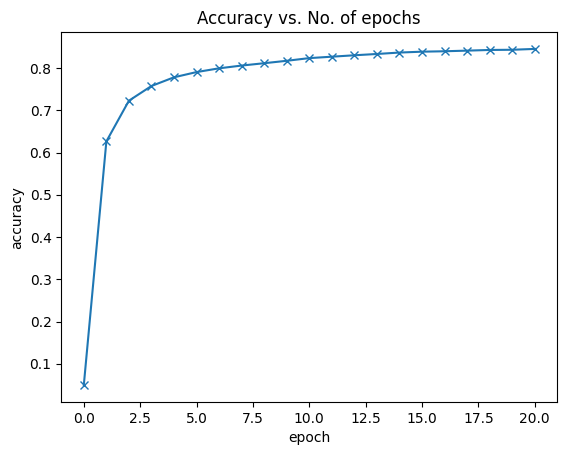

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


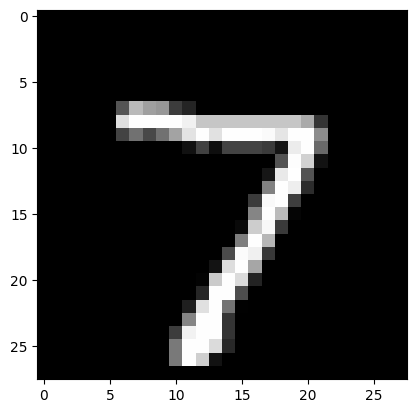

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


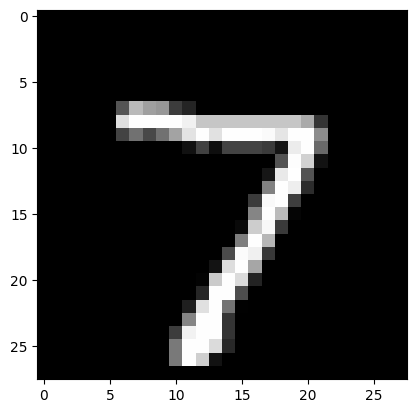

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


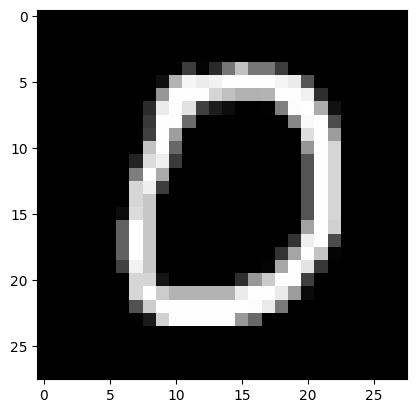

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


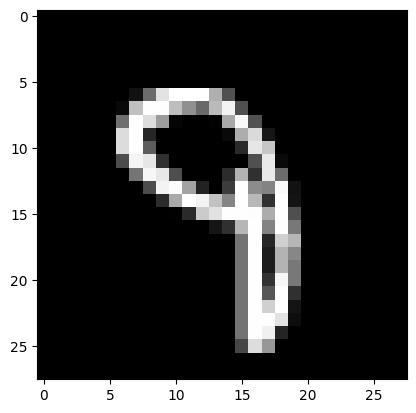

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


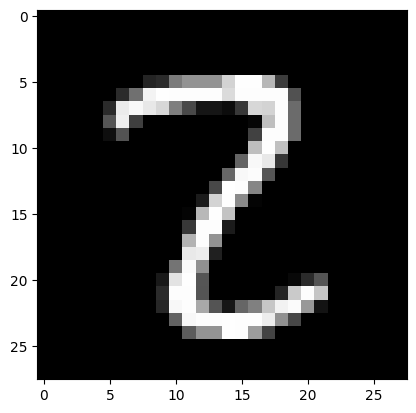

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.643386960029602, 'val_acc': 0.8614257574081421}